In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [183]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [184]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

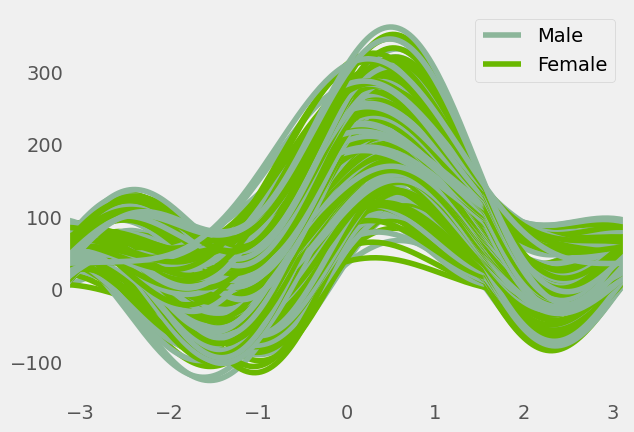

In [185]:
pd.plotting.andrews_curves(df,'Gender')

In [186]:
x = df.iloc[:,[3,4]].values

In [187]:
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[269981.28,
 184794.77142857143,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 37455.98455516028,
 35596.81859177644,
 25018.78161341407,
 22903.321536115873,
 20033.169133906726]

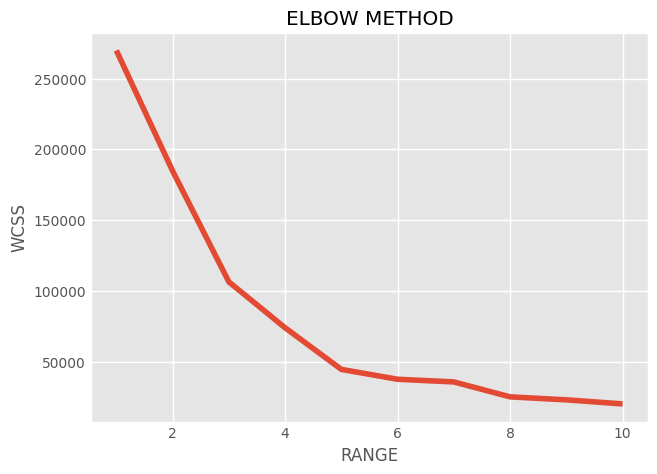

In [188]:
plt.style.use('ggplot')
plt.plot(range(1,11), wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

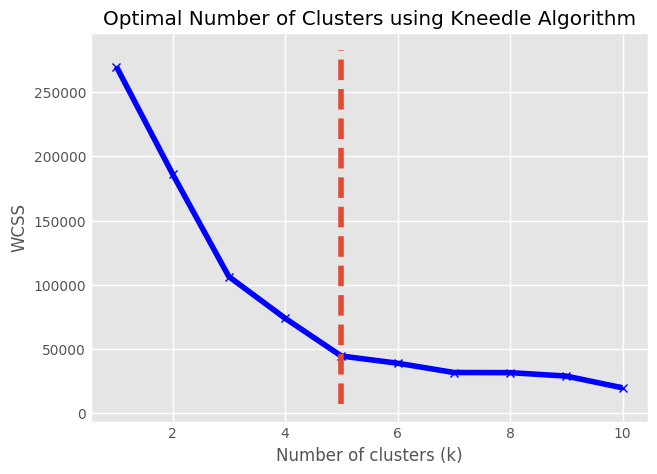

The optimal number of clusters detected by Kneedle is: 5


In [191]:
from kneed import KneeLocator
wcss = []

k_values = range(1, 11)  # Testing for k from 1 to 10

for i in k_values:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss
kneedle = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')

# Step 3: Plot the elbow graph
plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Optimal Number of Clusters using Kneedle Algorithm')

# Mark the elbow point
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# Step 4: Output the optimal k
print(f"The optimal number of clusters detected by Kneedle is: {kneedle.elbow}")

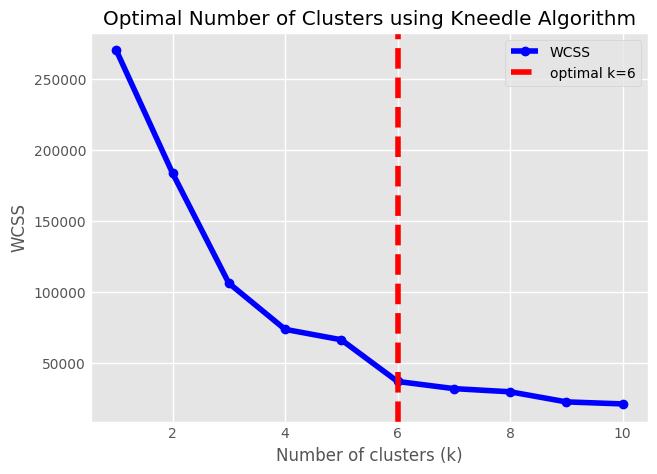

The optimal number of clusters detected by Kneedle is: 6


In [190]:
wcss = []

k_values = range(1, 11)  # Testing for k from 1 to 10

for i in k_values:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss
kneedle = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')

# Step 3: Plot the elbow graph
plt.plot(k_values, wcss, 'bo-', label='WCSS')
plt.axvline(x=kneedle.knee, color='r', linestyle='--', label= f'optimal k={kneedle.knee}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Optimal Number of Clusters using Kneedle Algorithm')
plt.legend()
plt.show()
print(f"The optimal number of clusters detected by Kneedle is: {kneedle.knee}")

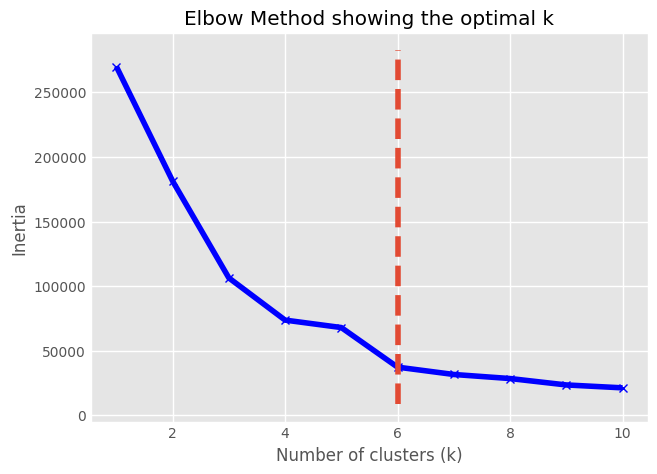

The optimal number of clusters detected by Kneedle is: 6


In [165]:
from kneed import KneeLocator
inertia = []
k_values = range(1, 11)  # Testing for k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Step 2: Use Kneedle to find the elbow point
kneedle = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')

# Step 3: Plot the elbow graph
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method showing the optimal k')

# Mark the elbow point
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# Step 4: Output the optimal k
print(f"The optimal number of clusters detected by Kneedle is: {kneedle.elbow}")

In [166]:
km = KMeans(n_clusters=5)
ymean = km.fit_predict(x)
ymean

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

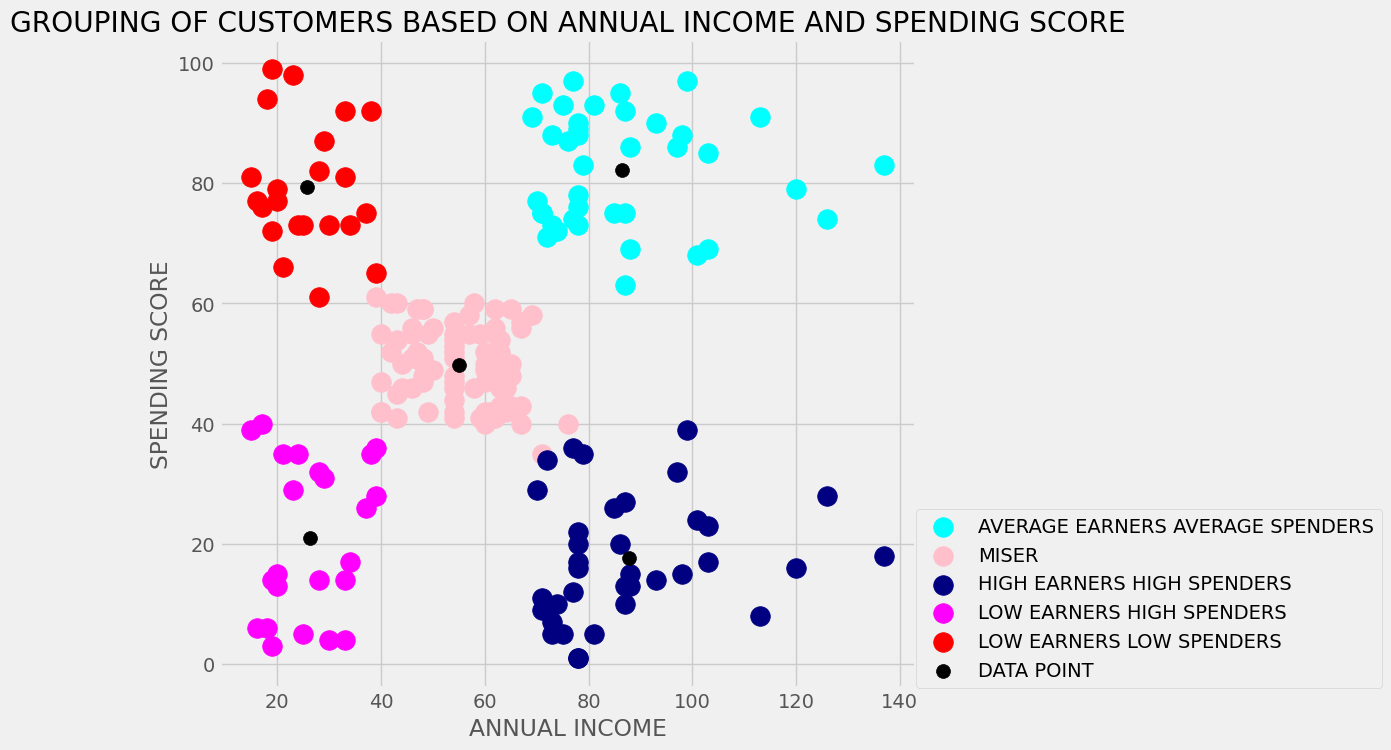

In [167]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(x[ymean == 0,0], x[ymean == 0,1], c='cyan', s = 200,label='AVERAGE EARNERS AVERAGE SPENDERS')
plt.scatter(x[ymean == 1,0], x[ymean == 1,1], c='pink', s = 200,label='MISER')
plt.scatter(x[ymean == 2,0], x[ymean == 2,1], c='navy', s = 200,label='HIGH EARNERS HIGH SPENDERS')
plt.scatter(x[ymean == 3,0], x[ymean == 3,1], c='magenta', s = 200,label='LOW EARNERS HIGH SPENDERS')
plt.scatter(x[ymean == 4,0], x[ymean == 4,1], c='red', s = 200,label='LOW EARNERS LOW SPENDERS')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black',s=100,label='DATA POINT')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()

In [168]:
x = df.iloc[:,[2,3]].values

In [169]:
wcss1 = []
for i in range (1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss1.append(km.inertia_)
wcss1

[176108.78000000003,
 87121.56591478697,
 59492.737994932715,
 39529.88796736351,
 31659.353138717815,
 29221.75088803089,
 22471.80467475862,
 20027.63588497273,
 17804.15639789324,
 14917.242892872448]

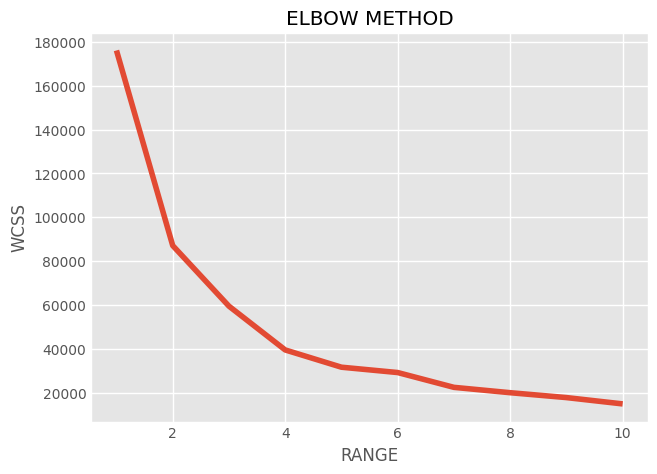

In [170]:
plt.style.use('ggplot')
plt.plot(range(1,11), wcss1)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [171]:
from kneed import KneeLocator


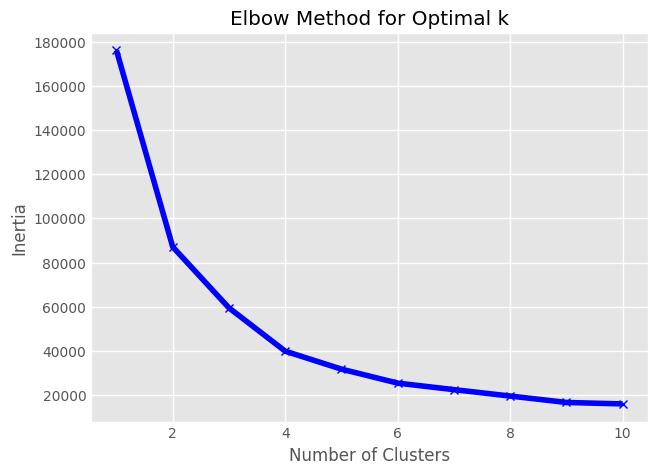

In [172]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the inertia for different k values
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. k
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


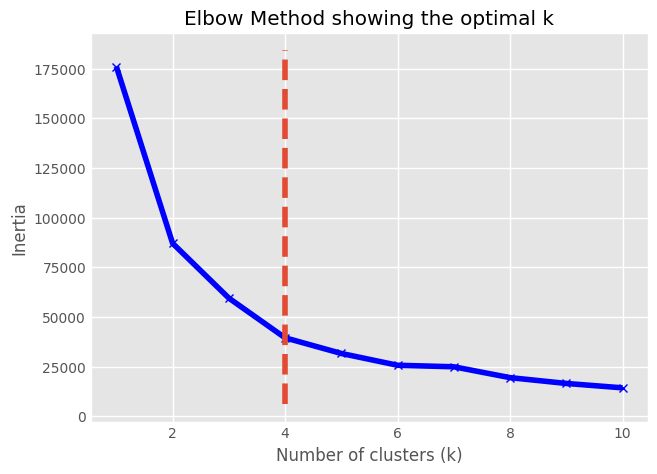

The optimal number of clusters detected by Kneedle is: 4


In [173]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
import numpy as np



# Step 1: Calculate inertia for different values of k
inertia = []
k_values = range(1, 11)  # Testing for k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Step 2: Use Kneedle to find the elbow point
kneedle = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')

# Step 3: Plot the elbow graph
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method showing the optimal k')

# Mark the elbow point
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# Step 4: Output the optimal k
print(f"The optimal number of clusters detected by Kneedle is: {kneedle.elbow}")


In [174]:
km = KMeans(n_clusters=4)
ymean = km.fit_predict(x)
ymean

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

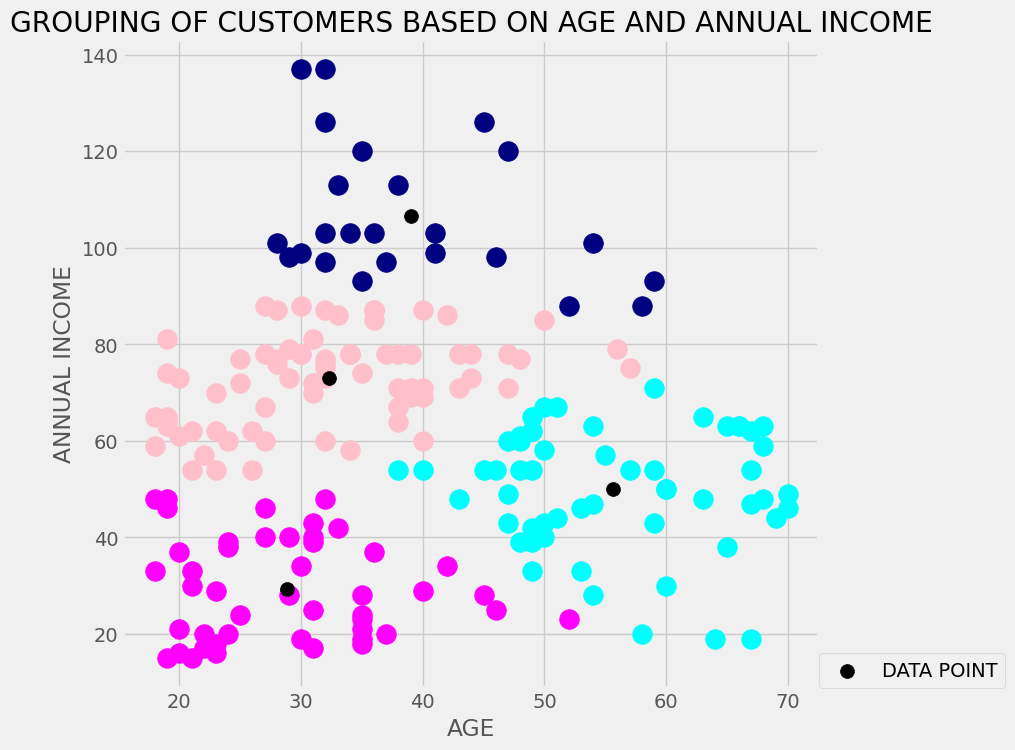

In [175]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(x[ymean == 0,0], x[ymean == 0,1], c='cyan', s = 200,label='')
plt.scatter(x[ymean == 1,0], x[ymean == 1,1], c='pink', s = 200,label='')
plt.scatter(x[ymean == 2,0], x[ymean == 2,1], c='navy', s = 200,label='')
plt.scatter(x[ymean == 3,0], x[ymean == 3,1], c='magenta', s = 200,label='')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black',s=100,label='DATA POINT')
plt.xlabel('AGE')
plt.ylabel('ANNUAL INCOME')
plt.title('GROUPING OF CUSTOMERS BASED ON AGE AND ANNUAL INCOME')
plt.legend(loc=[1,0])
plt.show()

In [176]:
x = df.iloc[:,[2,4]].values

In [177]:
wcss2 = []
for i in range (1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss2.append(km.inertia_)
wcss2

[171535.5,
 75949.15601023019,
 45844.53681626929,
 28172.705092506112,
 24058.948148061667,
 19848.770222608935,
 18750.394458100054,
 13415.843440725941,
 14722.329043093847,
 10962.71634703012]

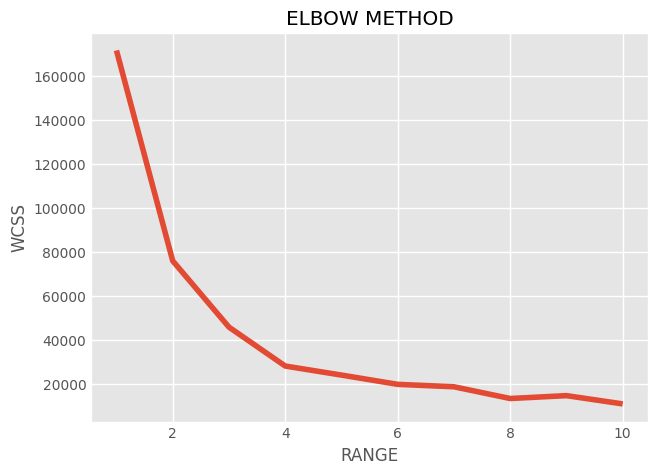

In [178]:
plt.style.use('ggplot')
plt.plot(range(1,11), wcss2)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

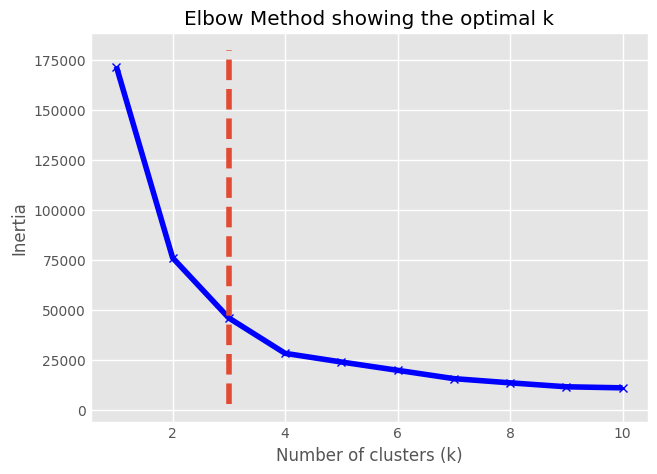

The optimal number of clusters detected by Kneedle is: 3


In [179]:
inertia = []
k_values = range(1, 11)  # Testing for k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Step 2: Use Kneedle to find the elbow point
kneedle = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')

# Step 3: Plot the elbow graph
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method showing the optimal k')

# Mark the elbow point
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# Step 4: Output the optimal k
print(f"The optimal number of clusters detected by Kneedle is: {kneedle.elbow}")

In [180]:
km = KMeans(n_clusters=3)
ymean = km.fit_predict(x)
ymean

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

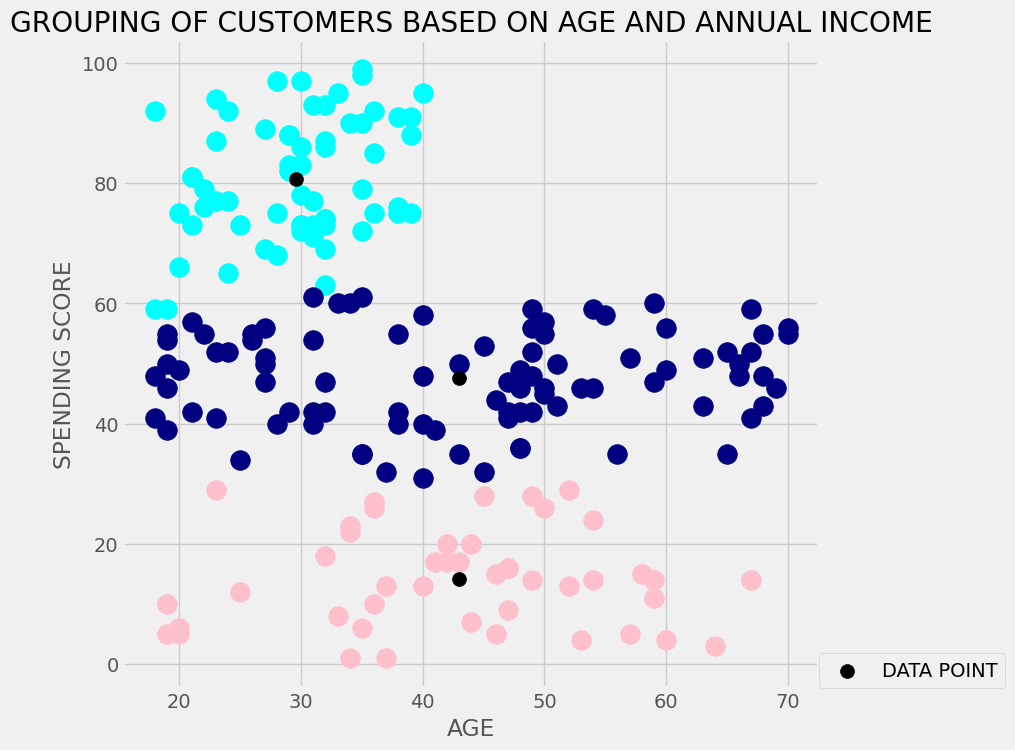

In [181]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(x[ymean == 0,0], x[ymean == 0,1], c='cyan', s = 200,label='')
plt.scatter(x[ymean == 1,0], x[ymean == 1,1], c='pink', s = 200,label='')
plt.scatter(x[ymean == 2,0], x[ymean == 2,1], c='navy', s = 200,label='')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='black',s=100,label='DATA POINT')
plt.xlabel('AGE')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON AGE AND ANNUAL INCOME')
plt.legend(loc=[1,0])
plt.show()